In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import pickle

In [6]:
import time

In [7]:
import matplotlib.gridspec as gridspec

In [8]:
import itertools

In [9]:
from sklearn.utils import resample

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
from sklearn.experimental import enable_iterative_imputer

In [12]:
from sklearn.impute import IterativeImputer

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
from sklearn import preprocessing

In [15]:
from sklearn.feature_selection import SelectKBest, chi2

In [16]:
from sklearn.feature_selection import SelectFromModel

In [21]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install plot_confusion_matrix

Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.metrics import confusion_matrix

In [24]:
pip install scikit-learn

In [25]:
pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/e9/3e4879974a7c4dcaca2a746dde3df08d0ae8f14c74b03591616ce5f0a8b1/scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl (10.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, classification_report

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn.neural_network import MLPClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
import xgboost as xgb

In [26]:
from mlxtend.classifier import EnsembleVoteClassifier

In [27]:
from mlxtend.plotting import plot_decision_regions

In [28]:
df = pd.read_csv('rainfall.csv')

In [29]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [30]:
df.shape

(142193, 24)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [32]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

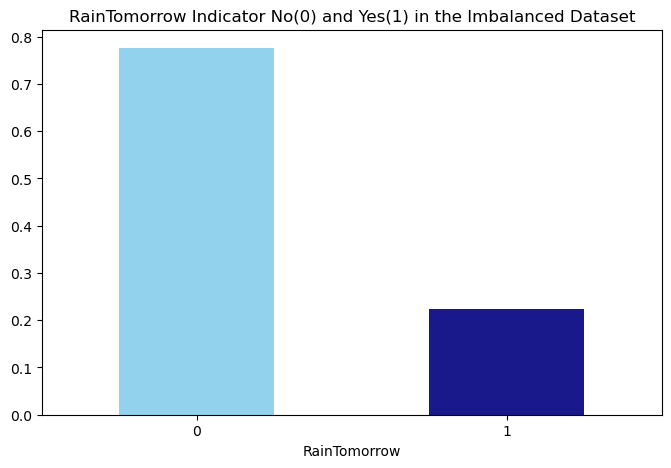

In [33]:
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

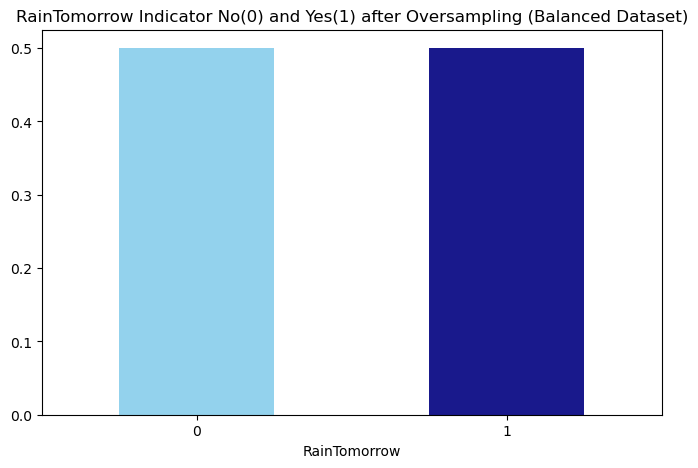

In [34]:
no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

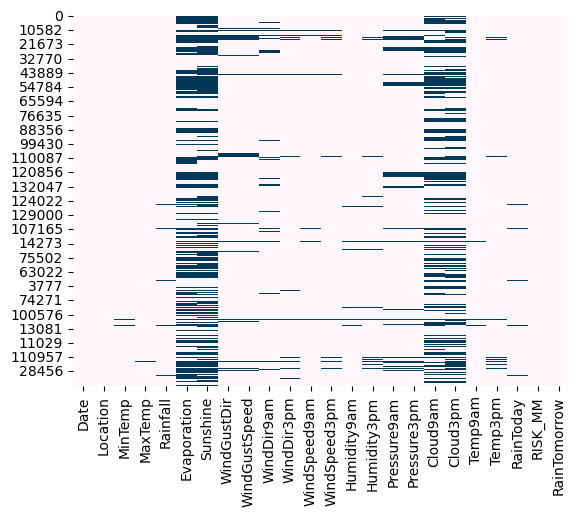

In [35]:
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')
plt.show()

In [36]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

Total   Percent
Sunshine     104831  0.475140
Evaporation   95411  0.432444
Cloud3pm      85614  0.388040
Cloud9am      81339  0.368664

In [37]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [38]:
# Impute categorical var with Mode

oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [39]:
df2 = oversampled[['Location','WindGustDir', 'WindDir9am' ,'WindDir3pm']]

In [40]:
# Convert categorical features to continuous features with Label Encoding

lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [41]:
oversampled.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   396         2     13.4     22.9       0.6          NaN       NaN   
1   397         2      7.4     25.1       0.0          NaN       NaN   
2   398         2     12.9     25.7       0.0          NaN       NaN   
3   399         2      9.2     28.0       0.0          NaN       NaN   
4   400         2     17.5     32.3       1.0          NaN       NaN   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity3pm  Pressure9am  \
0           13           44.0          13  ...         22.0       1007.7   
1           14           44.0           6  ...         25.0       1010.6   
2           15           46.0          13  ...         30.0       1007.6   
3            4           24.0           9  ...         16.0       1017.6   
4           13           41.0           1  ...         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8        0.0      0.0   
1       1007.8       NaN       NaN     17.2     24.3        0.0      0.0   
2       1008.7       NaN       2.0     21.0     23.2        0.0      0.0   
3       1012.8       NaN       NaN     18.1     26.5        0.0      1.0   
4       1006.0       7.0       8.0     17.8     29.7        0.0      0.2   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 24 columns]

In [42]:
# Multiple Imputation by Chained Equations

MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [43]:
# Detecting outliers with IQR

Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.119679
Sunshine            5.947404
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.681346
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [44]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(156852, 24)

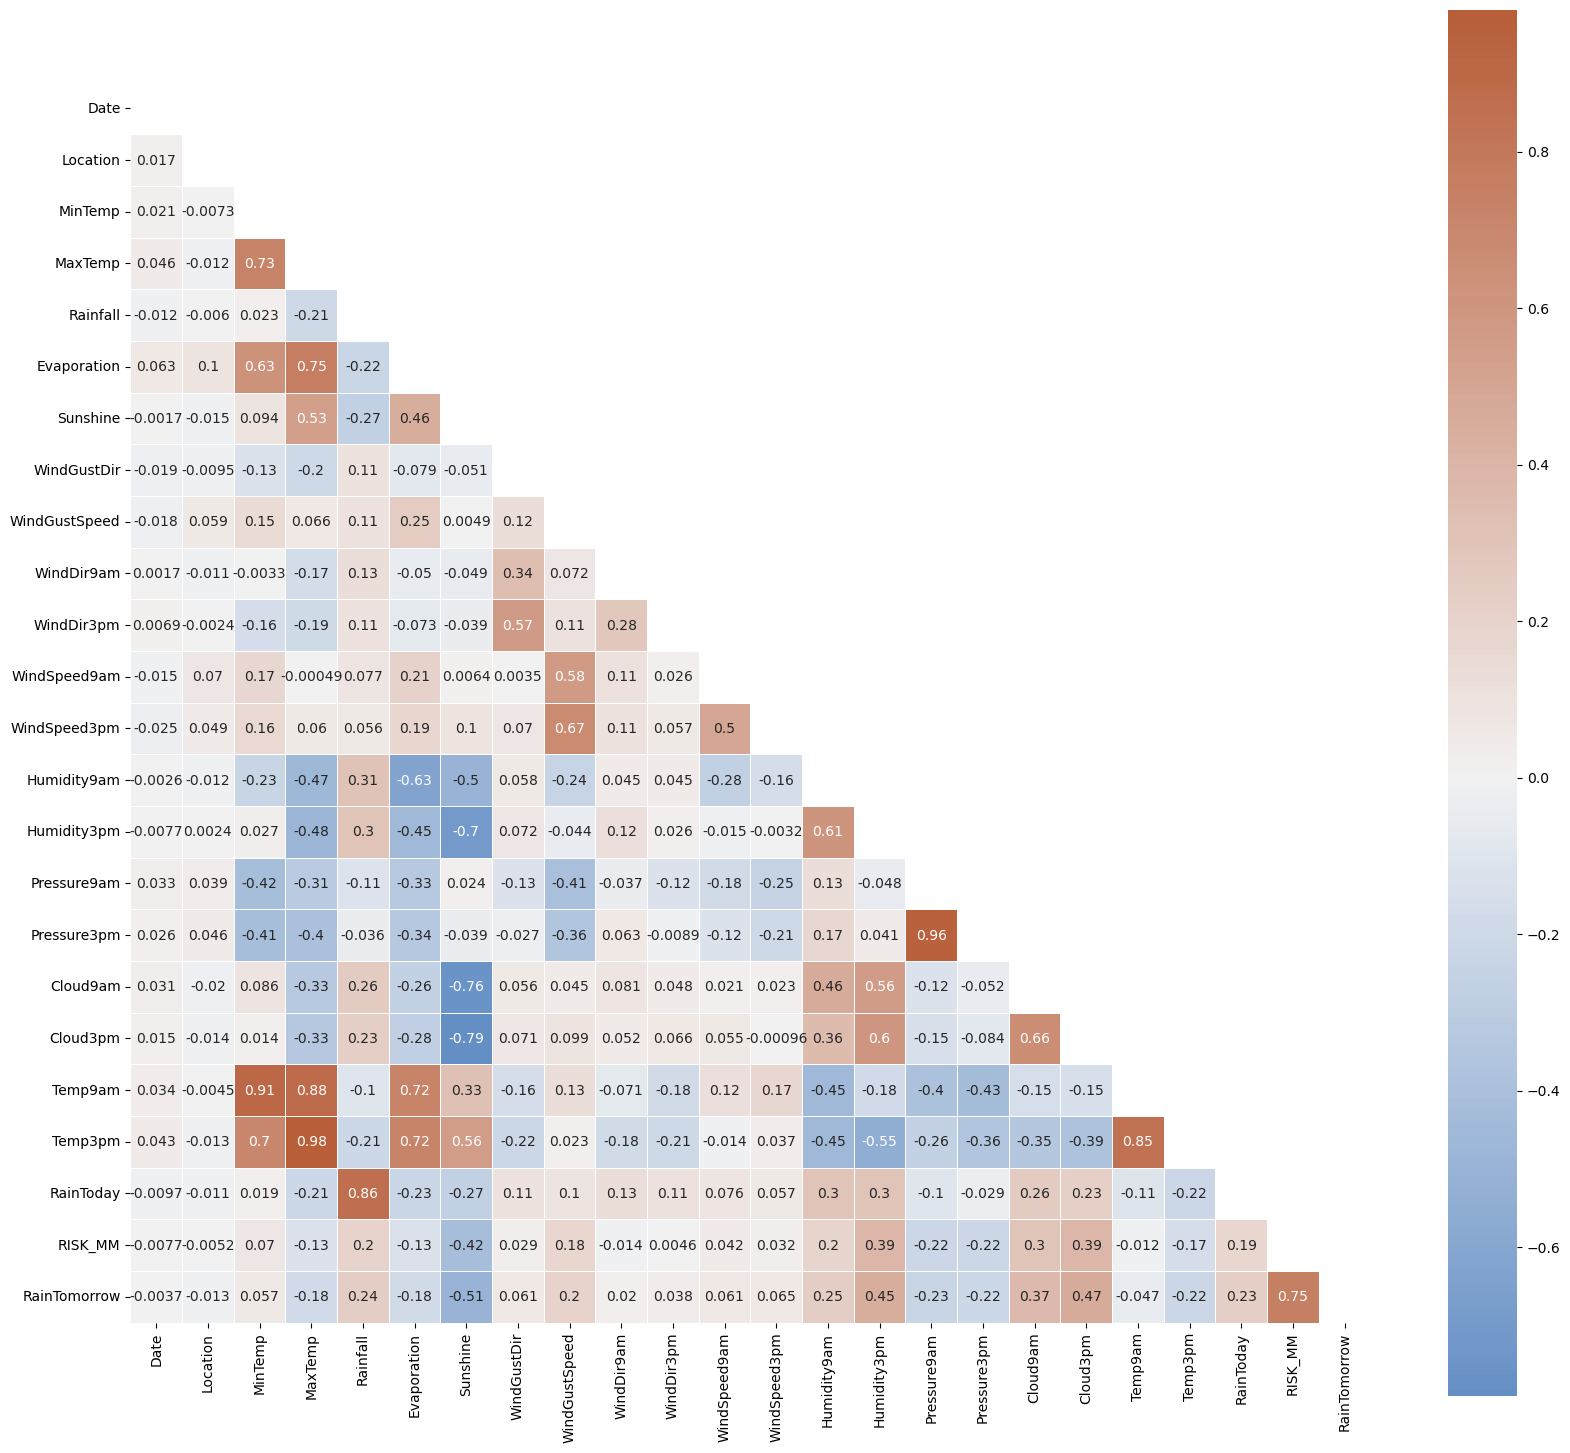

In [45]:
# Correlation Heatmap

corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

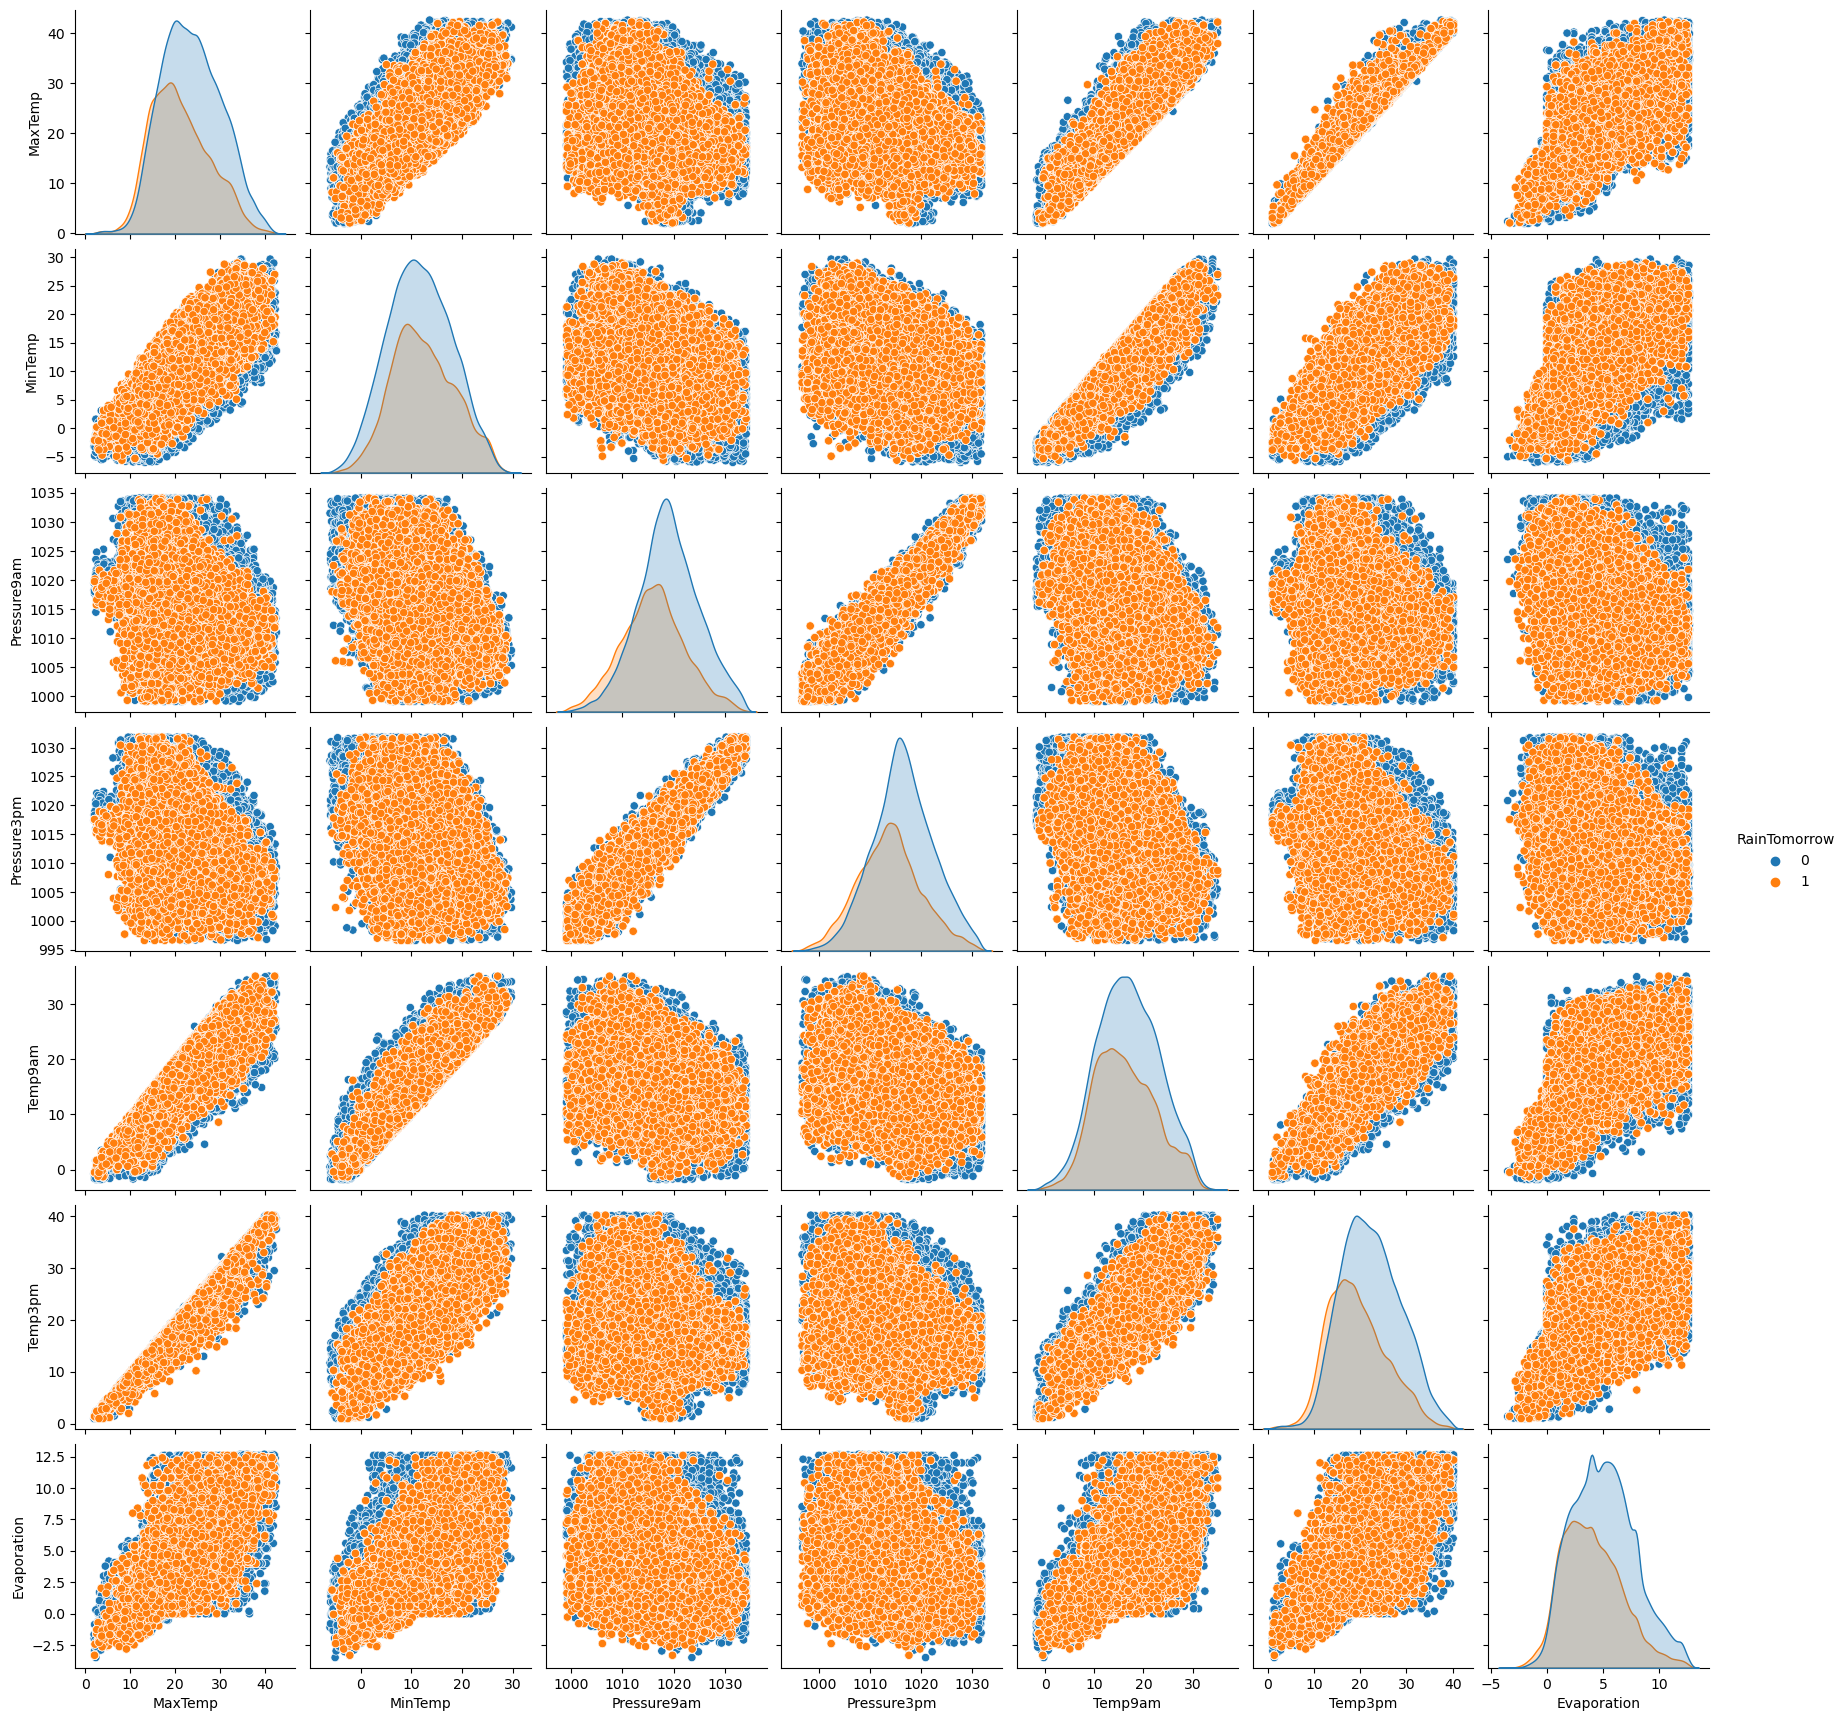

In [46]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )
plt.show()

In [47]:
# Standardizing data

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [48]:
# Feature Importance using Filter Method (Chi-Square)

X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


In [49]:
X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(RandomForestClassifier(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Cloud3pm', 'RISK_MM']
[0.00205993 0.00215407 0.00259089 0.00367568 0.0102656  0.00252838
 0.05894157 0.00143001 0.00797518 0.00177178 0.00167654 0.0014278
 0.00187743 0.00760691 0.03091966 0.00830365 0.01193018 0.02113544
 0.04962418 0.00270103 0.00513723 0.00352198 0.76074491]


In [50]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [51]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [52]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    ConfusionMatrixDisplay(X_test)
    ConfusionMatrixDisplay(y_test)
    
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.78963609007217
ROC Area under Curve = 0.76976981489154
Cohen's Kappa = 0.5494516226632338
Time taken = 2.908470630645752
              precision    recall  f1-score   support

           0    0.80822   0.85949   0.83307     23948
           1    0.75520   0.68005   0.71566     15265

    accuracy                        0.78964     39213
   macro avg    0.78171   0.76977   0.77436     39213
weighted avg    0.78758   0.78964   0.78736     39213



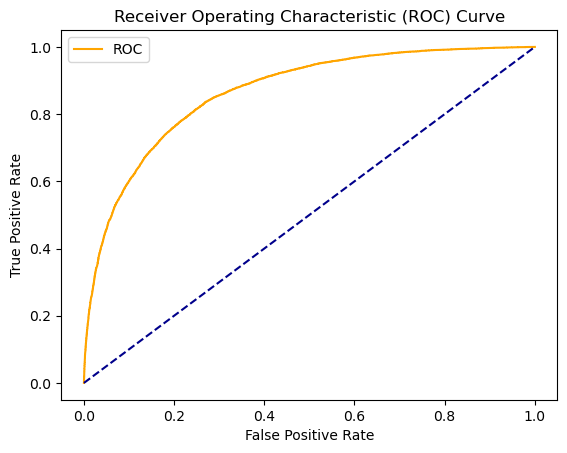

In [53]:
# Logistic Regression


params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)


Accuracy = 0.8601229184199117
ROC Area under Curve = 0.8577266028573427
Cohen's Kappa = 0.7086280441390518
Time taken = 0.5442092418670654
              precision    recall  f1-score   support

           0    0.89899   0.86855   0.88351     23948
           1    0.80418   0.84690   0.82499     15265

    accuracy                        0.86012     39213
   macro avg    0.85159   0.85773   0.85425     39213
weighted avg    0.86208   0.86012   0.86073     39213



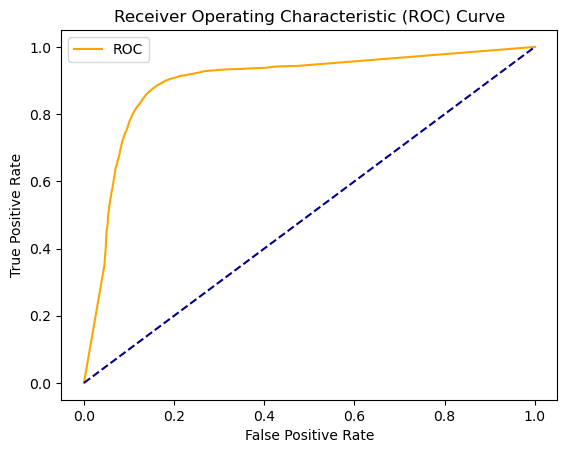

In [54]:
# Decision Tree


params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)


Accuracy = 0.8890674011169765
ROC Area under Curve = 0.8831220619892067
Cohen's Kappa = 0.7665900797168334
Time taken = 202.2225432395935
              precision    recall  f1-score   support

           0    0.90853   0.90997   0.90925     23948
           1    0.85841   0.85627   0.85734     15265

    accuracy                        0.88907     39213
   macro avg    0.88347   0.88312   0.88329     39213
weighted avg    0.88902   0.88907   0.88904     39213



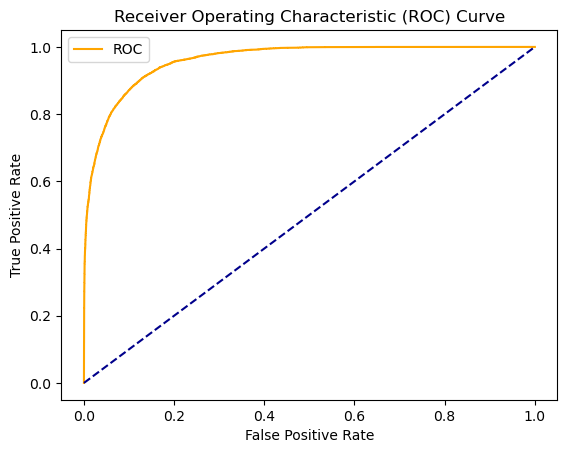

In [55]:
# Neural Network

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)


Accuracy = 0.9598347486802846
ROC Area under Curve = 0.961154451032155
Cohen's Kappa = 0.9160966204270719
Time taken = 15.7306649684906
              precision    recall  f1-score   support

           0    0.97853   0.95519   0.96672     23948
           1    0.93224   0.96711   0.94936     15265

    accuracy                        0.95983     39213
   macro avg    0.95538   0.96115   0.95804     39213
weighted avg    0.96051   0.95983   0.95996     39213



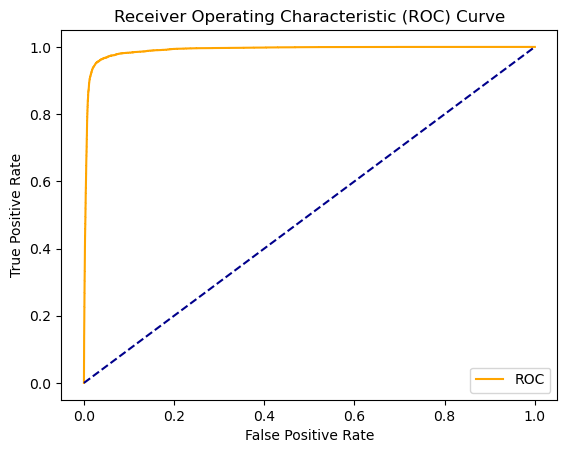

In [56]:
# XGBoost

params_xgb = {'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)


Accuracy = 0.9280595720806876
ROC Area under Curve = 0.9265770863620824
Cohen's Kappa = 0.8493714659078331
Time taken = 35.16079378128052
              precision    recall  f1-score   support

           0    0.94812   0.93327   0.94064     23948
           1    0.89783   0.91988   0.90872     15265

    accuracy                        0.92806     39213
   macro avg    0.92297   0.92658   0.92468     39213
weighted avg    0.92854   0.92806   0.92821     39213



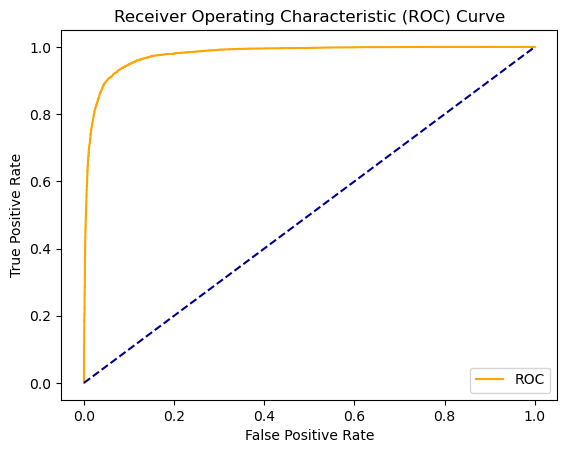

In [57]:
# Random Forest

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)


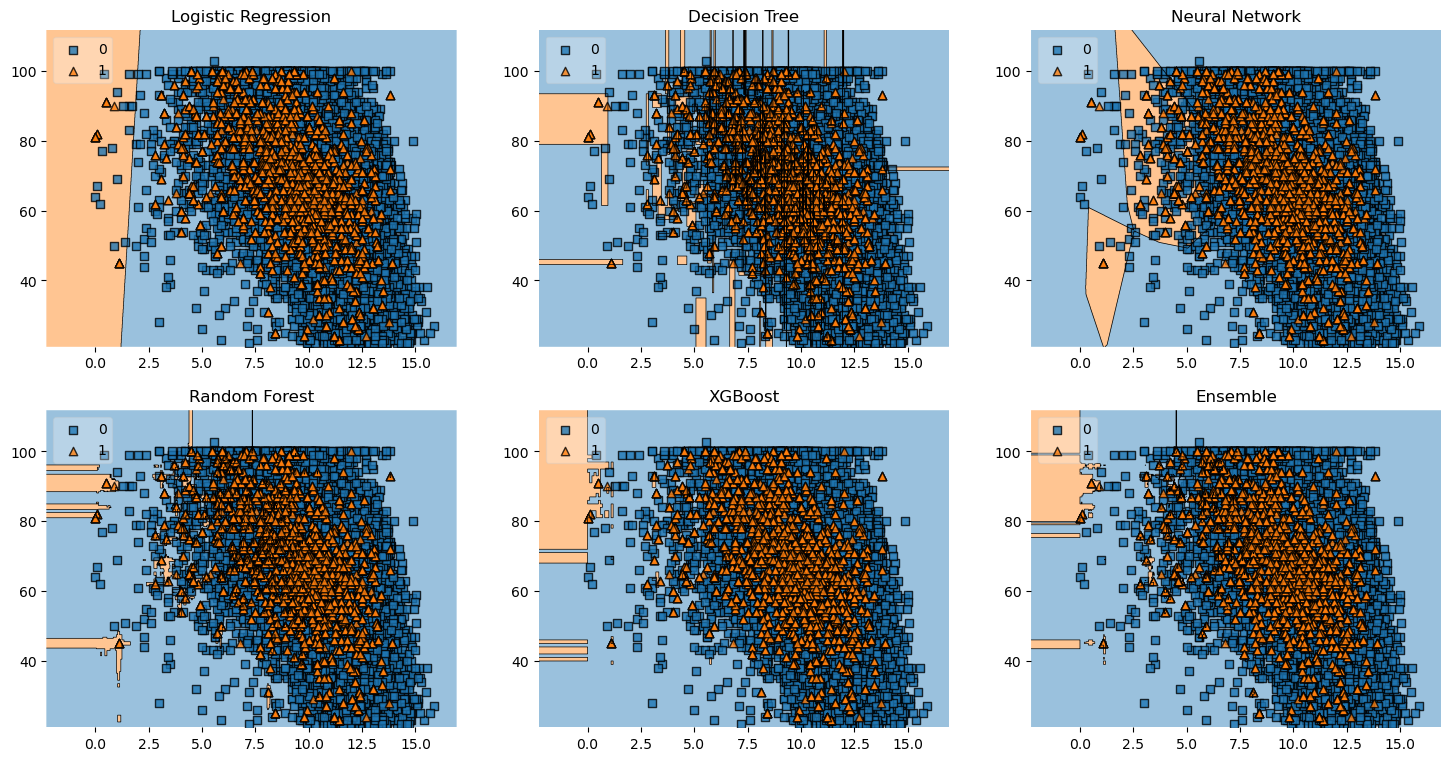

In [58]:
value = 1.80
width = 0.90

clf1 = LogisticRegression(random_state=12345)
clf2 = DecisionTreeClassifier(random_state=12345) 
clf3 = MLPClassifier(random_state=12345, verbose = 0)
clf4 = RandomForestClassifier(random_state=12345)
clf5 = xgb.XGBClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf4, clf5], weights=[1, 1], voting='soft')

X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'XGBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, eclf],labels,itertools.product([0, 1, 2],repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, filler_feature_values={2: value}, filler_feature_ranges={2: width}, legend=2)
    plt.title(lab)

plt.show()

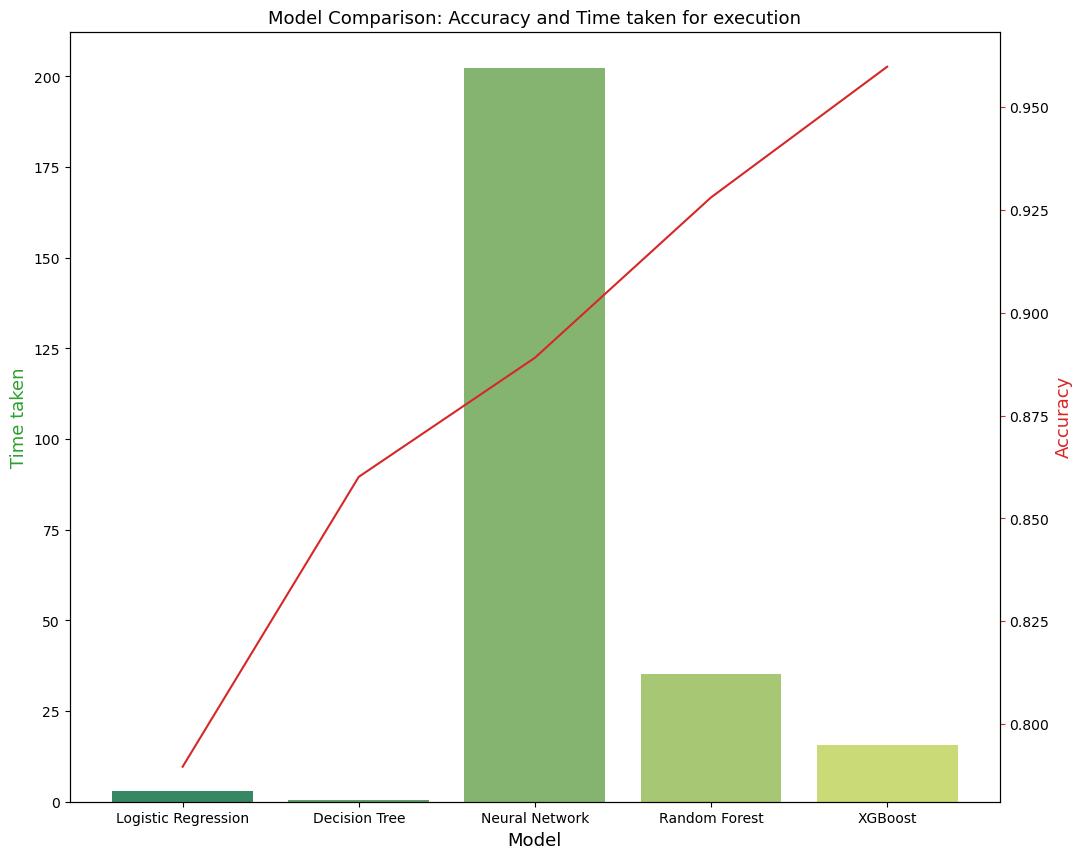

In [59]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

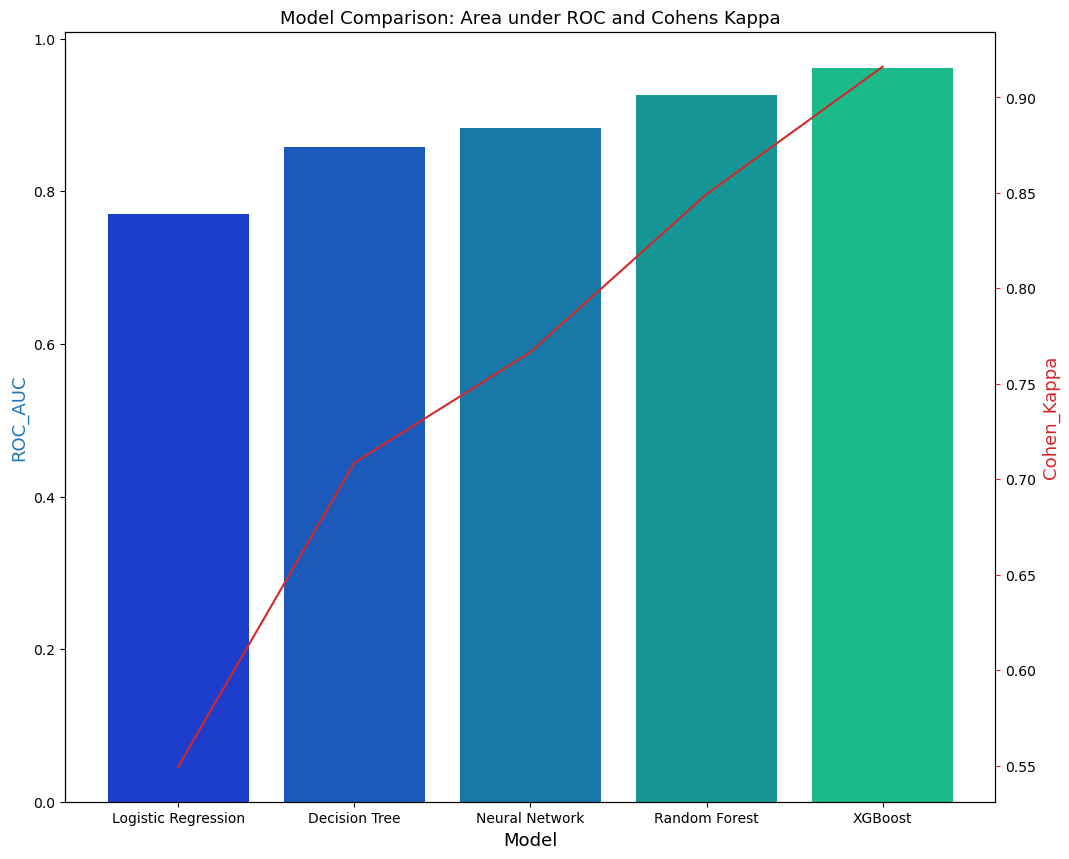

In [60]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

In [61]:
pickle.dump(model_rf, open('model_rf.pkl', 'wb'))

In [62]:
pickle.dump(model_xgb , open('model_xgb.pkl', 'wb'))

In [63]:
model =  pickle.load(open('model_rf.pkl', 'rb'))

In [64]:
model =  pickle.load(open('model_xgb.pkl', 'rb'))

In [65]:
input1 = [[12,4.4,12.8,0,2.2,6.1,8,22,8,8,6,7,77,50,1022.5,1019.5,7,4,7.1,12.4,0]]

In [66]:
prediction1 = model.predict(input1) 

pred = int(prediction1[0])
if pred == 0:
    print("Tomorrow will be no Rain fall")
else:
    print("Tomorrow will be Rain fall")

Tomorrow will be no Rain fall
